<a href="https://colab.research.google.com/github/Akshat19Ak/PROJECTS/blob/main/STOCK_MARKET_PREDICITION_PROJECT%2019TH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

In [11]:
def load_stock_data(ticker='GOOGL'):
    end_date = datetime.now()  #
    start_date = end_date - timedelta(days=5*365 + 90)
    # Setted start date as 5 years and 3 months before the end date
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data = stock_data[['Close', 'Open', 'High', 'Low', 'Volume']]
    # Select only required columns for analysis
    return stock_data


data = load_stock_data('GOOGL')

data

[*********************100%***********************]  1 of 1 completed


Price,Close,Open,High,Low,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2019-10-23,62.654373,61.786521,62.674799,61.786521,21282000
2019-10-24,62.728107,62.728107,62.916922,62.391327,20224000
2019-10-25,62.986668,62.373887,63.171001,62.231904,27104000
2019-10-28,64.216209,63.519737,64.727357,63.385724,65428000
2019-10-29,62.805328,63.569556,63.808691,62.553738,52654000
...,...,...,...,...,...
2025-01-13,191.009995,190.070007,191.179993,187.360001,21823700
2025-01-14,189.660004,191.240005,191.979996,188.309998,17174900


In [12]:
data['SMA_30'] = data['Close'].rolling(window=30).mean()
# Calculate 30-day Simple Moving Average (SMA) of closing prices
data['SMA_100'] = data['Close'].rolling(window=100).mean()
data['Daily_Return'] = data['Close'].pct_change()
 # Calculate daily return as percentage change in closing prices

data

Price,Close,Open,High,Low,Volume,SMA_30,SMA_100,Daily_Return
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,,,
Date,,,,,,,,
2019-10-23,62.654373,61.786521,62.674799,61.786521,21282000,NaN,NaN,NaN
2019-10-24,62.728107,62.728107,62.916922,62.391327,20224000,NaN,NaN,0.001177
2019-10-25,62.986668,62.373887,63.171001,62.231904,27104000,NaN,NaN,0.004122
2019-10-28,64.216209,63.519737,64.727357,63.385724,65428000,NaN,NaN,0.019521
2019-10-29,62.805328,63.569556,63.808691,62.553738,52654000,NaN,NaN,-0.021971
...,...,...,...,...,...,...,...,...
2025-01-13,191.009995,190.070007,191.179993,187.360001,21823700,186.989771,171.762298,-0.005363
2025-01-14,189.660004,191.240005,191.979996,188.309998,17174900,187.677229,171.991225,-0.007068


In [13]:
# Remove rows with NaN values that resulted from SMA calculations or daily return calculation
data = data.dropna()
data

Price,Close,Open,High,Low,Volume,SMA_30,SMA_100,Daily_Return
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,,,
Date,,,,,,,,
2020-03-17,55.701077,54.335030,56.096642,52.265533,83194000,68.495864,67.732968,0.041994
2020-03-18,54.362431,52.805574,55.049937,51.662714,93044000,67.907630,67.650048,-0.024033
2020-03-19,55.382732,54.214467,57.422340,52.586868,74064000,67.352343,67.576594,0.018769
2020-03-20,53.217579,56.340756,56.718388,52.913182,82878000,66.675198,67.478904,-0.039094
2020-03-23,52.516125,52.627720,53.152817,50.261298,83672000,65.969456,67.361903,-0.013181
...,...,...,...,...,...,...,...,...
2025-01-13,191.009995,190.070007,191.179993,187.360001,21823700,186.989771,171.762298,-0.005363
2025-01-14,189.660004,191.240005,191.979996,188.309998,17174900,187.677229,171.991225,-0.007068


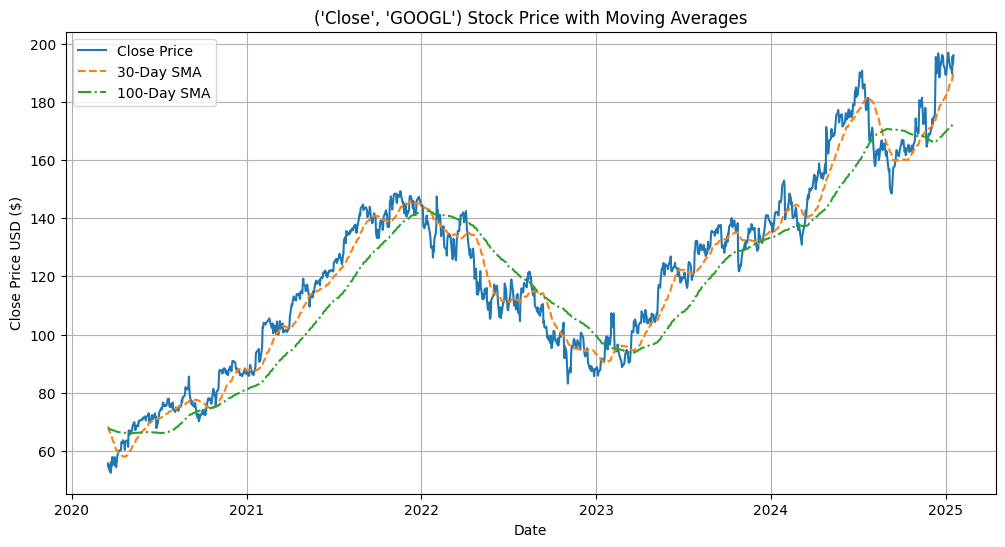

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
# Plot closing price as the main stock price line
plt.plot(data['SMA_30'], label='30-Day SMA', linestyle='--')
plt.plot(data['SMA_100'], label='100-Day SMA', linestyle='-.')
plt.title(f'{data.columns[0]} Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Prepare data for scaling
 # Define the features to be used for scaling and prediction
features = ['Close', 'SMA_30', 'SMA_100', 'Daily_Return']
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit and transform selected features for normalized data
scaled_data = scaler.fit_transform(data[features])
scaled_data

array([[0.0220635 , 0.07907025, 0.01497745, 0.6946888 ],
       [0.01279014, 0.07461616, 0.01420077, 0.3600999 ],
       [0.0198582 , 0.07041154, 0.01351276, 0.57699301],
       ...,
       [0.99085586, 0.9882704 , 0.99435159, 0.63925714],
       [0.97256747, 0.99372633, 0.99711611, 0.41347184],
       [0.99397318, 1.        , 1.        , 0.56305398]])

In [16]:
# Define training and testing data (5 years for training, last 1 year for testing)
train_size = int(len(scaled_data) * ((5*365) / (5*365 + 365)))
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]  # Including previous 60 values in test data

In [17]:
def create_dataset(data, sequence_length=60):
    x, y = [], []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

In [18]:
 # Creat training sequence and labels
x_train, y_train = create_dataset(train_data)
x_test, y_test = create_dataset(test_data)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# Built the LSTM model with adjusted layers and units to improve R2 score
model = Sequential([
    LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),  # First LSTM layer with 150 units and outputing sequences
    Dropout(0.3),  # to prevent overfittin
    LSTM(units=150, return_sequences=False),
    Dropout(0.3),
    Dense(units=75),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
 # Importing EarlyStopping to prevent overfitting by halting training when loss stops improving
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=5)  # Stop training if loss does not improve over 5 epochs

model.fit(x_train, y_train, batch_size=32, epochs=150, callbacks=[early_stop])  # Train model on training data with batch size 32 and up to 150 epochs


Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - loss: 0.0503
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - loss: 0.0039
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - loss: 0.0029
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - loss: 0.0024
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 228ms/step - loss: 0.0019
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 0.0020
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - loss: 0.0021
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - loss: 0.0016
Epoch 9/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - loss: 0.0018
Epoch 10/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 232ms/step - loss: 0.0012
Epoch 11/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - loss: 0.0013
Epoch 12/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 0.0013
Epoch 13/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - loss: 0.0014
Epoch 14/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - loss: 0.0012
Epoch 15/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 1

In [21]:
# Make predictions on the test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(np.concatenate((predictions, test_data[60:, 1:]), axis=1))[:, 0]  # Scale back predictions to original value


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


<ipython-input-22-0e08098b1ece>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


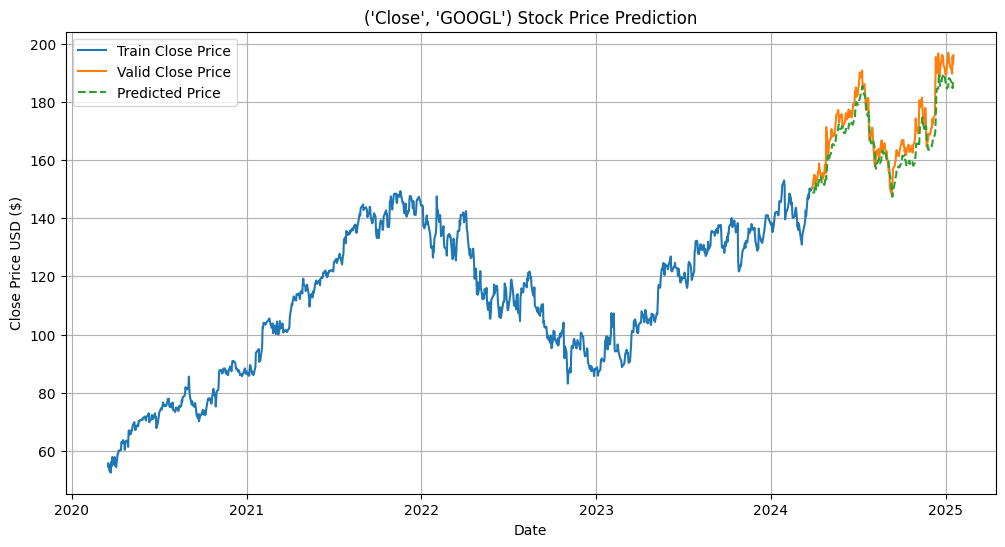

In [22]:

# Visualize actual vs. predicted prices
train = data[:train_size]  # Define the train data portion for visualization
valid = data[train_size:]  # Define the valid (test) data portionn
valid['Predictions'] = predictions

plt.figure(figsize=(12, 6))  # Set plot size for visualization
plt.plot(train['Close'], label='Train Close Price')  # Plot training data's Close price
plt.plot(valid['Close'], label='Valid Close Price')  # Plot actual Close price of test set
plt.plot(valid['Predictions'], label='Predicted Price', linestyle='--')  # Plot predicted Close price of test set
plt.title(f'{data.columns[0]} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
mae = mean_absolute_error(valid['Close'], valid['Predictions'])
mse = mean_squared_error(valid['Close'], valid['Predictions'])
mape = mean_absolute_percentage_error(valid['Close'], valid['Predictions'])
r2 = r2_score(valid['Close'], valid['Predictions'])


In [24]:

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 4.733738001913966
Mean Squared Error (MSE): 31.25368720662367
Mean Absolute Percentage Error (MAPE): 0.02731572602118738
R² Score: 0.7830441552259861


In [25]:
# Predict the next 30 days
last_60_days = test_data[-60:]  # Get the last 60 days of the test data as the initial input for future predictions
future_predictions = []  # Initialize list to store future predictions

In [26]:
for _ in range(30):  # Predict next 30 days
    pred_input = last_60_days[-60:].reshape(1, -1, last_60_days.shape[1])
    prediction = model.predict(pred_input)
    future_predictions.append(prediction[0, 0])
    new_entry = np.concatenate((prediction, last_60_days[-1, 1:].reshape(1, -1)), axis=1)
    # Create new entry with prediction and other features
    last_60_days = np.append(last_60_days, new_entry, axis=0)[1:]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

In [27]:
# Prepare future predictions for inverse scaling
dummy_features = np.zeros((len(future_predictions), scaled_data.shape[1] - 1))
scaled_future_predictions = np.concatenate((np.array(future_predictions).reshape(-1, 1), dummy_features), axis=1)
future_predictions = scaler.inverse_transform(scaled_future_predictions)[:, 0]  # Inverse scale predictions

#  next 30 days
future_dates = [valid.index[-1] + timedelta(days=i) for i in range(1, 31)]  # Generate dates for 30-day predictions


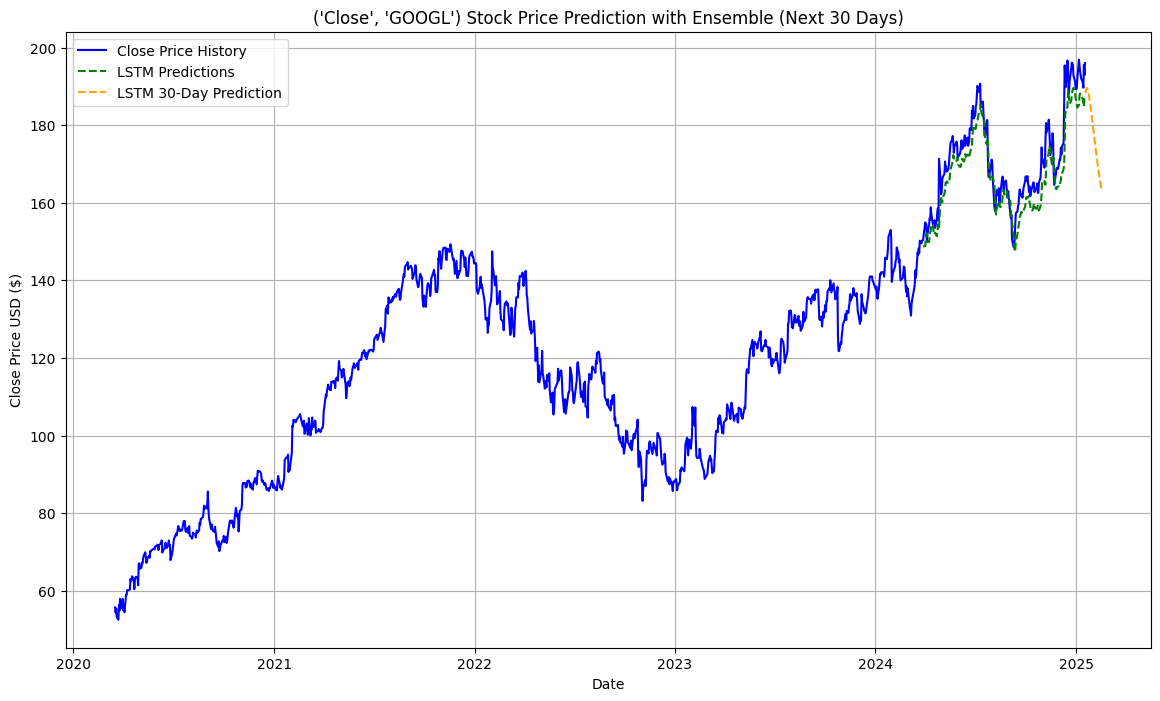

In [28]:
# Visualize the future predictions with ensemble
plt.figure(figsize=(14, 8))
# Plot historical Close price
plt.plot(data['Close'], label='Close Price History', color='blue')
# Plot LSTM test predictions
plt.plot(valid.index, valid['Predictions'], label='LSTM Predictions', color='green', linestyle='--')
# Plot future LSTM predictions
plt.plot(future_dates, future_predictions, label='LSTM 30-Day Prediction', color='orange', linestyle='--')
#plt.plot(future_dates, ensemble_prediction, label='Ensemble Prediction', color='purple', linestyle='-.')  # Plot
plt.title(f'{data.columns[0]} Stock Price Prediction with Ensemble (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.grid(True)
plt.show()


In [30]:

#MAKING MAGNIFIED FORM
from matplotlib.dates import DateFormatter  # Import DateFormatter to format date labels on x-axis

# Set the date range to the last 5 months
five_months_ago = data.index[-1] - pd.DateOffset(months=5)
train = train[train.index >= five_months_ago]
valid = valid[valid.index >= five_months_ago]


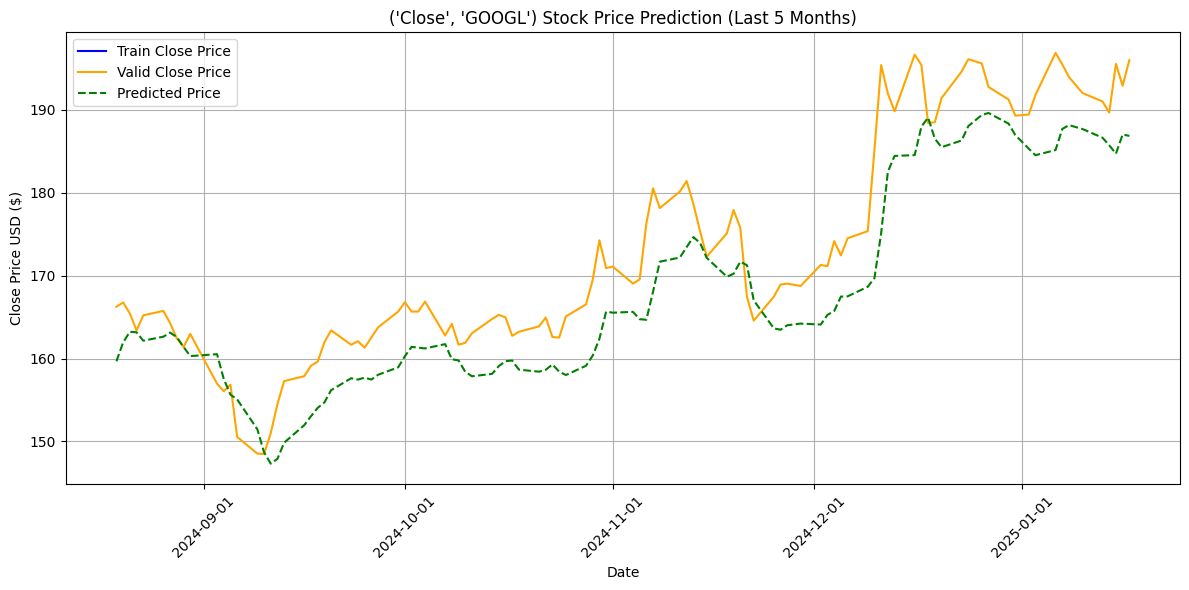

In [32]:

# Plot the graph with magnified view of the last 5 months
plt.figure(figsize=(12, 6))

# Plot last 5 months of the train data (actual stock prices)
plt.plot(train['Close'], label='Train Close Price', color='blue')
plt.plot(valid['Close'], label='Valid Close Price', color='orange')
plt.plot(valid['Predictions'], label='Predicted Price', linestyle='--', color='green')

plt.title(f'{data.columns[0]} Stock Price Prediction (Last 5 Months)')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

# Display the date labels on x-axis
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)  # Rotate date labels for better readability

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()